In [2]:
import pandas as pd

salary = pd.read_csv(r'C:\Users\nadys\.cache\kagglehub\datasets\kasiviswanath00\polynomial-regression\versions\1\rank_salary.csv')

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Итерации остановлены на шаге 25
MSE: 0.0021616066705753057
R2: 0.9974892663922424


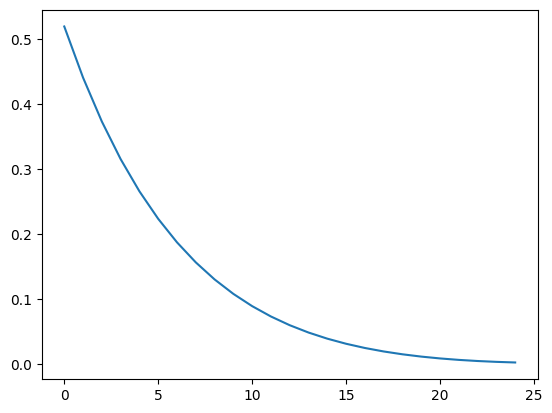

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

X = salary['Level'].to_numpy().reshape(-1, 1)
y = salary['Salary'].to_numpy().reshape(-1, 1)

y_st = StandardScaler().fit_transform(y)
X_st = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_st, y_st, test_size=0.2, random_state=10)

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=10)

w_current = np.random.random(2)
epsilon = 0.01
weight_evolution = []
MSE_evolution = []

for step in range(800):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1] < epsilon:
        print(f'Итерации остановлены на шаге {step}')
        break
    MSE_evolution.append(mean_squared_error(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), MSE_evolution)
print(f'MSE: {MSE_evolution[-1]}')
print(f'R2: {r2_score(y_test, sgd_regressor.predict(X_test))}')

In [28]:
y_pred = sgd_regressor.predict(X_test)
y_pred

array([ 0.87347569, -0.61300366])